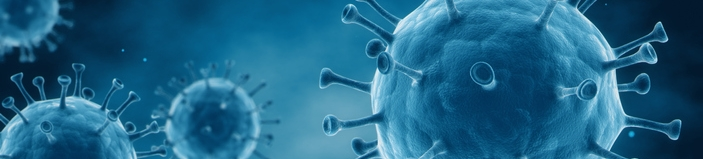

# Pima Indians Diabetes Database

## Overview
This Notebook will be completed in two main ways.
First, find and visualize useful data or meaningful relationships within the data.
Second, select a model based on the visualization of the previous process. Transform or refine the data into the appropriate form for the model to be used.
<br/><br/>

It is a DataSet that can predict diabetes among Pima Indians. We can understand relationships through data through various insights.So I think it's important to visualize and understand this. Since the size of the data is not large, beginners will be able to easily follow it.


##### "We need to address the imbalance in "Outcome" data in a variety of ways."
<br/><br/>

#### My opinion :
* 1) In this Notebook, the imbalance in "Outcome" data was solved by a technique called SMOTE.
* 2) If the above problem is solved, it should be modeled to produce good results using various models.

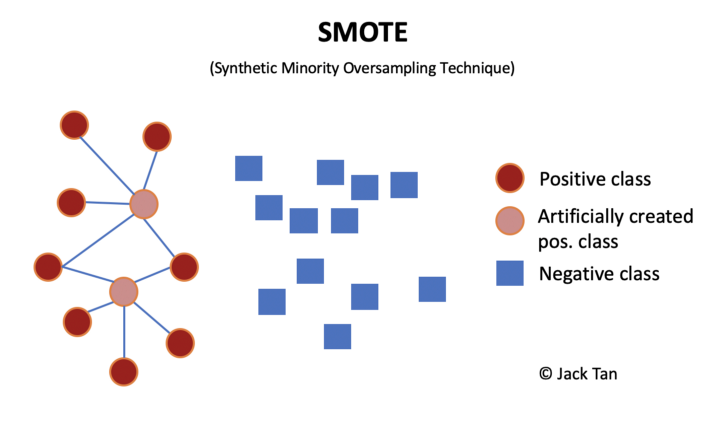

### There are two ways of dealing with data imbalances.
* 1) Increase the number of small amounts of data. (Oversampling)
* 2) It can reduce the number of data in large quantities. (Undersampling)

SMOTE is Oversampling technique belonging to one of these. It's creates and amplifies new data through relationships between data.

More information can be found in this document => https://arxiv.org/pdf/1106.1813.pdf

***
## My Workflow

#### 1. Import & Install libray
* Import Basic libray
* Import Enginnering libray

#### 2. Check out my data
* Check Shape / Info / Describe

#### 3. Exploratory Data Analysis(EDA) with Visualization [Before Preprocessing]
* Plot the null values
* Plot the Outecome Percent
* Distribution of various data over Outcome column (DistPlot)
* Distribution of various data over Outcome column (BoxPlot)
* Plot the Outcome per BloodPressure / Age with [3d interactive Plot]
* Plot the Outcome per BloodPressure / Age with [3d interactive Plot]
* Diabetes data Heatmap Plot

#### 4. Preprocessing Data
* Drop more than 400 columns Insulin

#### 5. Feature Enginnering
* Get useful columns
* OverSampling [SMOTE]

#### 6. Modeling
* Evaluation function definition

###### Before SMOTE 
* LogisticRegression Modeling
* RandomForest Modeling
* LightGBM Modeling

###### After SMOTE
* LogisticRegression Modeling
* RandomForest Modeling
* LightGBM Modeling

#### 7. Submission
* Submit the predictions
<br/><br/>
***

# 1. Import & Install libray
* Import Basic libray
* Import Enginnering libray

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

import seaborn as sns
import missingno as msno
import plotly.express as px
import  matplotlib.pyplot as plt


plt.style.use('seaborn')
%matplotlib inline

In [ ]:
train_df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
train_df.head()

# 2. Check out my data
* Check Shape / Info / Describe

In [ ]:
train_df.shape

In [ ]:
train_df.info()

In [ ]:
train_df.describe()

In [ ]:
sns.color_palette("Blues", as_cmap=True)

In [ ]:
GnBu_palette = sns.color_palette("GnBu",10)
Blues_palette = sns.color_palette("Blues",10)
sns.palplot(Blues_palette)
sns.palplot(GnBu_palette)

#### ✔️ This notebook will use this palettes.

# 3. Exploratory Data Analysis(EDA) with Visualization [Before Preprocessing]
* Plot the null values
* Plot the Outecome Percent
* Distribution of various data over Outcome column (DistPlot)
* Distribution of various data over Outcome column (BoxPlot)
* Plot the Outcome per BloodPressure / Age with [3d interactive Plot]
* Plot the Outcome per BloodPressure / Age with [3d interactive Plot]
* Diabetes data Heatmap Plot

### 3-1) Plot the null values

In [ ]:
pd.DataFrame(train_df.isnull().sum(), columns=["Null Count"]).style.background_gradient(cmap='Blues')

In [ ]:
msno.matrix(df=train_df.iloc[:,:],figsize=(5,5),color=GnBu_palette[4])

### 3-2) Plot the Outecome Percent

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(10,4))

train_df['Outcome'].value_counts().plot.pie(
    explode=[0,0.1],autopct='%1.1f%%',ax=axes[0],shadow=True, colors=[Blues_palette[1],Blues_palette[3]]
)

sns.countplot('Outcome',data=train_df,ax=axes[1], palette=[GnBu_palette[6],GnBu_palette[7]])
axes[1].patch.set_alpha(0)

fig.text(0.28,0.92,"Distribution of Outcome percent", fontweight="bold", fontfamily='serif', fontsize=17)

plt.show()

In [ ]:
pd.crosstab(train_df['Pregnancies'],train_df['Outcome'],margins=True).style.background_gradient(cmap='Blues')

### 3-3) Distribution of various data over Outcome column (DistPlot)

In [ ]:
train_col = train_df.drop(['Outcome','Pregnancies'],axis=1).columns
i = [0, 1, 0, 1, 0, 1]
j = [0, 0, 1, 1, 2, 2]

fig, axes = plt.subplots(3,2, figsize=(20,18))

for index, col, i, j in zip(range(6),train_col, i, j):

    sns.distplot(train_df[train_df['Outcome']==1][col], ax=axes[j,i], label='Outcome 1', color=Blues_palette[index+2])
    sns.distplot(train_df[train_df['Outcome']==0][col], ax=axes[j,i], label='Outcome 0', color=GnBu_palette[index+2])
    axes[j,i].patch.set_alpha(0)
    axes[j,i].set_title("Distribution Outcome per Pregnancies", fontweight="bold", fontfamily='serif', fontsize=14)
    axes[j,i].legend()
plt.show()

### 3-4) Distribution of various data over Outcome column (BoxPlot)

In [ ]:
train_col = train_df.drop(['Outcome','Pregnancies'],axis=1).columns
i = [0, 1, 0, 1, 0, 1]
j = [0, 0, 1, 1, 2, 2]

fig, axes = plt.subplots(3,2, figsize=(10,12), constrained_layout = True )

for index, col, i, j in zip(range(6),train_col, i, j):

    sns.boxplot(x="Outcome", y=col,  data=train_df, ax=axes[j,i], palette=[Blues_palette[8-index],GnBu_palette[8-index]])

    axes[j,i].set_title("Distribution Outcome per Pregnancies", fontweight="bold", fontfamily='serif', fontsize=14)
    axes[j,i].legend()
plt.show()


## 3-5) Plot the Outcome per BloodPressure / Age with [3d interactive Plot]

In [ ]:
fig = px.scatter_3d(train_df.iloc[:500], x='BloodPressure', y='Outcome', z='Age',
                    color='Age')
fig.show()

### 3-6) Diabetes data Heatmap Plot

In [ ]:
train_df[train_df.columns[:8]].corr().style.background_gradient(cmap='Blues')

In [ ]:
sns.heatmap(train_df[train_df.columns[:8]].corr(),annot=True,cmap='Blues')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# 4. Preprocessing Data
* Drop more than 400 columns Insulin

In [ ]:
df = train_df[train_df['Insulin']<=400]
df.head()

In [ ]:
print('After Drop Insulin DataFrame Shape : ',df.shape)

# 5. Feature Enginnering
* Get useful columns
* OverSampling [SMOTE]

In [ ]:
features = ['Glucose','BloodPressure','Insulin','BMI','Age']

In [ ]:
x = df[features]
y = df['Outcome']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.head()

In [ ]:
y_train.head()

In [ ]:
smote = SMOTE()
x_over, y_over = smote.fit_resample(x_train,y_train)

In [ ]:
x_over.shape

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(10,4))

y_over.value_counts().plot.pie(
    explode=[0,0.1],autopct='%1.1f%%',ax=axes[0],shadow=True, colors=[Blues_palette[1],Blues_palette[3]]
)

sns.countplot(y_over, ax=axes[1], palette=[GnBu_palette[6],GnBu_palette[7]])
axes[1].patch.set_alpha(0)

fig.text(0.28,0.92,"Distribution of After  SMOTE Outcome percent", fontweight="bold", fontfamily='serif', fontsize=17)

plt.show()

# 6. Modeling
* Evaluation function definition

#### Before SMOTE 
* LogisticRegression Modeling
* RandomForest Modeling
* LightGBM Modeling

#### After SMOTE
* LogisticRegression Modeling
* RandomForest Modeling
* LightGBM Modeling

## Before SMOTE ------------------------

### 6-1) Evaluation function definition

In [ ]:
def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuacy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('confusion')
    print(confusion)
    print('accuacy : {}'.format(np.around(accuacy,4)))
    print('precision: {}'.format(np.around(precision,4)))
    print('recall : {}'.format(np.around(recall,4)))
    print('F1 : {}'.format(np.around(f1,4)))  
    print('ROC_AUC : {}'.format(np.around(roc_auc,4)))

### 6-2) LogisticRegression Modeling

In [ ]:
lg_reg = LogisticRegression()

lg_reg.fit(x_train, y_train)
pred = lg_reg.predict(x_test)
pred_proba = lg_reg.predict_proba(x_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)

### 6-2) RandomForest Modeling

In [ ]:
rf_clf = RandomForestClassifier()
param = {'n_estimators' : [100],
         'max_depth':[8,9,10],
         'min_samples_split':[2,5,7],
         'min_samples_leaf':[6.5,7,7.5]
        }

In [ ]:
grid = GridSearchCV(rf_clf,param_grid = param,scoring = 'accuracy',cv=5)
grid.fit(x_train ,y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_score_

In [ ]:
pred = grid.predict(x_test)
pred_proba = grid.predict_proba(x_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)

### 6-2) LightGBM Classification Modeling

In [ ]:
model = lgb.LGBMClassifier(
    n_estimators=400,
    num_leaves=20,
    min_data_in_leaf=60,
    learning_rate=0.01,
    boosting='gbdt',
    objective='binary',
    metric='auc',
    Is_training_metric=True,
    n_jobs=-1
)

In [ ]:
model.fit(x_train,y_train)

In [ ]:
pred = model.predict(x_test)
pred_proba = model.predict_proba(x_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)

## After SMOTE ------------------------

### 6-3) LogisticRegression Modeling

In [ ]:
lg_reg = LogisticRegression()

lg_reg.fit(x_over, y_over)
pred = lg_reg.predict(x_test)
pred_proba = lg_reg.predict_proba(x_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)

### 6-3) RandomForest Modeling

In [ ]:
rf_clf = RandomForestClassifier()
param = {'n_estimators' : [200],
         'max_depth':[10],
         'min_samples_split':[2],
         'min_samples_leaf':[7]
        }

In [ ]:
grid = GridSearchCV(rf_clf,param_grid = param,scoring = 'accuracy',cv=5)
grid.fit(x_over ,y_over)

pred = grid.predict(x_test)
pred_proba = grid.predict_proba(x_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)

### 6-3) LightGBM Classification Modeling

In [ ]:
model = lgb.LGBMClassifier(
    n_estimators=400,
    num_leaves=20,
    min_data_in_leaf=60,
    learning_rate=0.01,
    boosting='gbdt',
    objective='binary',
    metric='auc',
    Is_training_metric=True,
    n_jobs=-1
)

In [ ]:
model.fit(x_over,y_over)

In [ ]:
pred = model.predict(x_test)
pred_proba = model.predict_proba(x_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)

# 7. Submission
* Submit the predictions

In [ ]:
submission = pd.DataFrame(x_test)

In [ ]:
pred = model.predict(x_test)

In [ ]:
submission['Outcome'] = y_test
submission['Predict_Outcome'] = pred

In [ ]:
submission.head()

###  If this notebook is useful for your kaggling, "UPVOTE" for it 👀
#### THX to Reading My Notebook🌈